In [2]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

RANDOM_STATE = 1234
np.random.seed(2)

In [3]:
train = pd.read_csv("D:/githubrepo/ML_models/Work/digits/Data/train.csv")
test = pd.read_csv("D:/githubrepo/ML_models/Work/digits/Data/test.csv")

In [4]:
X_train = train.drop(['label'], axis=1)
y_train = train['label']

del train

In [5]:
X_train.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [6]:
test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [7]:
X_train = X_train / 255.0
test = test / 255.0

In [8]:
X_train = X_train.values.reshape(-1, 28, 28, 1)
test = test.values.reshape(-1, 28, 28, 1)

In [9]:
y_train = pd.get_dummies(data=y_train).astype(int)

In [10]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=RANDOM_STATE)

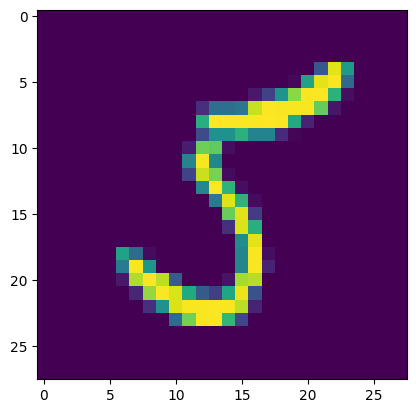

In [11]:
g = plt.imshow(X_train[0])

In [12]:
model = tf.keras.Sequential()

model.add(layers.Conv2D(filters=32, kernel_size=(5,5), padding='Same', 
                       activation=tf.nn.relu, input_shape = (28,28,1)))
model.add(layers.Conv2D(filters=32, kernel_size=(5,5), padding='Same', 
                       activation=tf.nn.relu))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Dropout(0.25))


model.add(layers.Conv2D(filters=64, kernel_size=(3,3), padding='Same', 
                       activation=tf.nn.relu, input_shape = (28,28,1)))
model.add(layers.Conv2D(filters=64, kernel_size=(3,3), padding='Same', 
                       activation=tf.nn.relu))
model.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(256,activation=tf.nn.relu))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(10,activation=tf.nn.softmax))

In [13]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, epsilon=1e-8), 
              # if it is one hot encoded, use categorical cross entropy, otherwise (1, 2, 3), use sparse categorical cross entropy
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
if(tf.test.is_built_with_cuda()):
    print("CUDA avaliable")
else: 
    print("CUDA not avaliable")

CUDA not avaliable


In [15]:
history = model.fit(X_train, y_train, batch_size=50, epochs=2,
                    validation_data=(X_val, y_val))

Epoch 1/2
756/756 [==============================] - 130s 169ms/step - loss: 0.1899 - accuracy: 0.9399 - val_loss: 0.0672 - val_accuracy: 0.9790
Epoch 2/2
756/756 [==============================] - 151s 199ms/step - loss: 0.0635 - accuracy: 0.9798 - val_loss: 0.0345 - val_accuracy: 0.9890


In [16]:
yhat = model.predict(X_train)

1182/1182 [==============================] - 30s 25ms/step


In [17]:
yhat[0].argmax()

5

In [18]:
y_train.iloc[0].argmax()

5

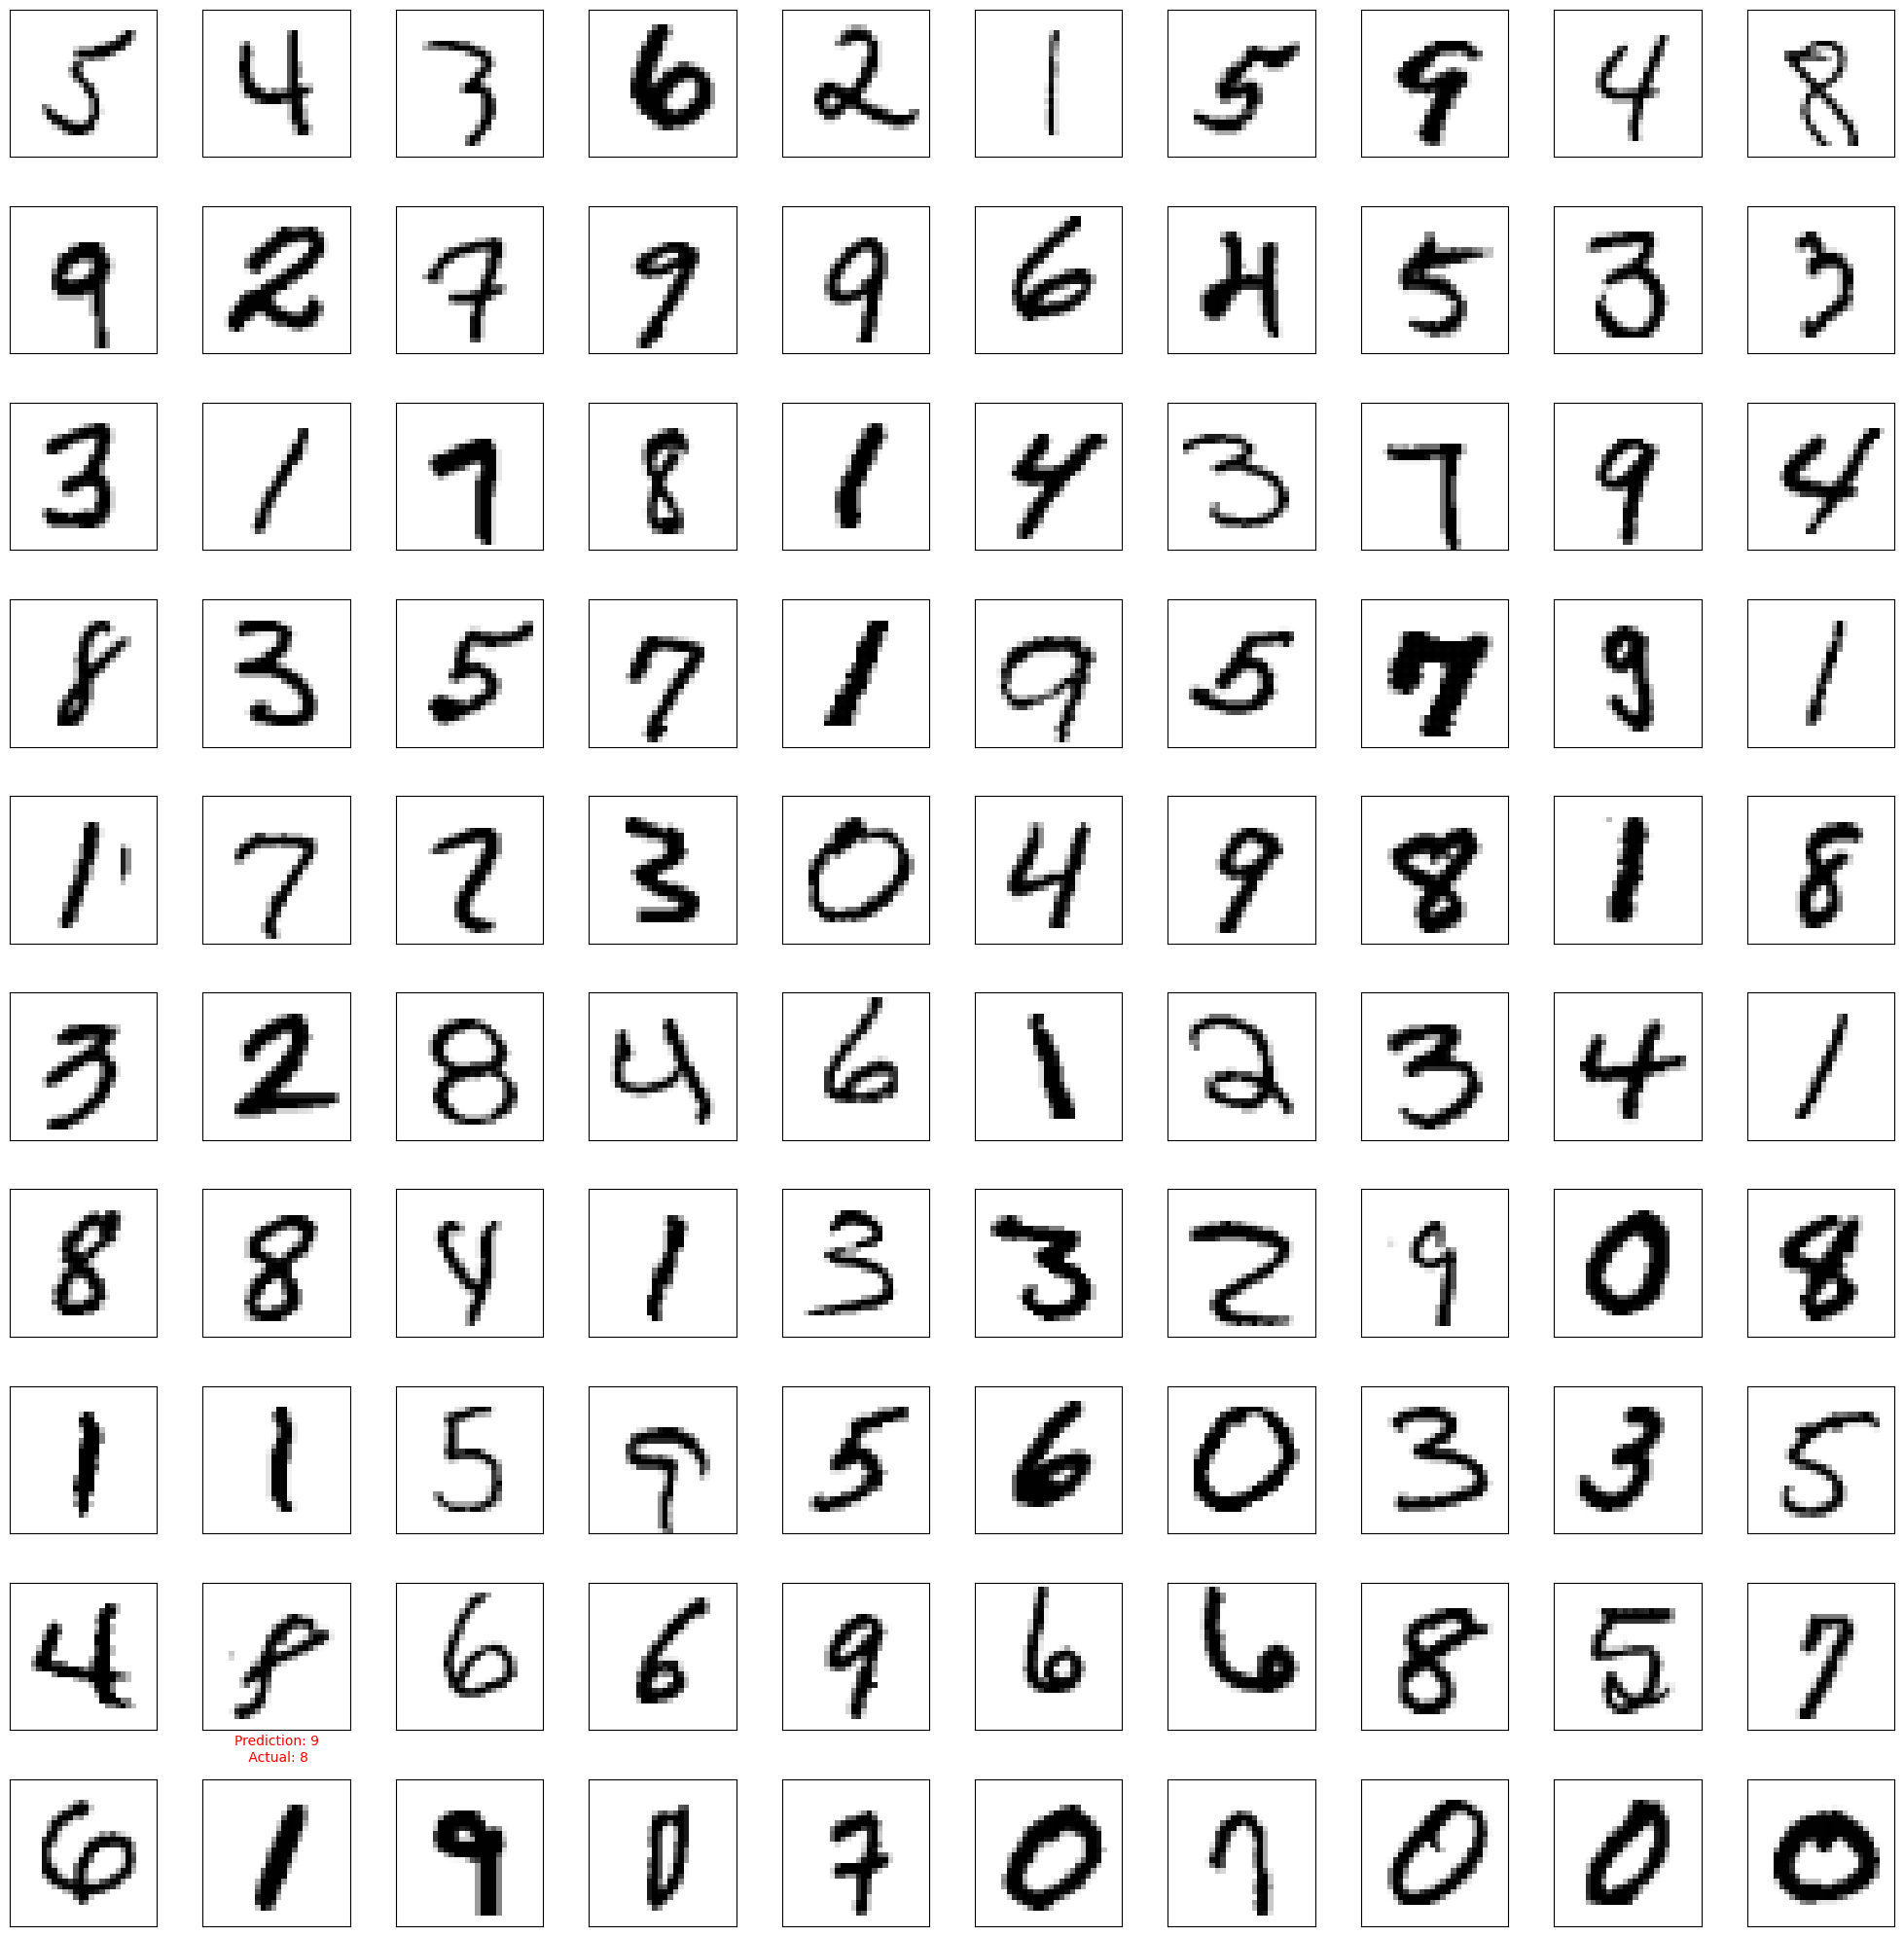

In [29]:
plt.figure(figsize=(20, 20))
for i in range(100):
  plt.subplot(10, 10, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(X_train[i], cmap=plt.cm.binary)
  if (y_train.iloc[i].argmax() != yhat[i].argmax()):
    plt.xlabel(f"Prediction: {yhat[i].argmax()}\n Actual: {y_train.iloc[i].argmax()}", color='red')
plt.tight_layout()
plt.show()